# Shakespeare plays dataset
 This dataset consists of details of Shakespeare plays along with player deatils 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('Shakespeare_data.csv') #Loading data frame
df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.


Displays number of lines in each of Shakespeare plays in the dataset in an ascending order. There are 36 unique plays. Hamlet is the longest play with 4244 lines and A comedy of errors is the shortest with 2055 lines.

In [2]:
#number of lines in each play
lines= df.groupby('Play').count().sort_values(by='PlayerLine',ascending=True)['PlayerLine']
lines=lines.to_frame()
lines['Play'] = lines.index.tolist()
lines.index = np.arange(0,len(lines))
lines.columns =['Lines','Play']
lines


,Lines,Play
0,2055,A Comedy of Errors
1,2300,A Midsummer nights dream
2,2357,Two Gentlemen of Verona
3,2403,The Tempest
4,2586,macbeth
5,2641,Pericles
6,2648,Twelfth Night
7,2662,Timon of Athens
8,2704,Much Ado about nothing
9,2726,Titus Andronicus


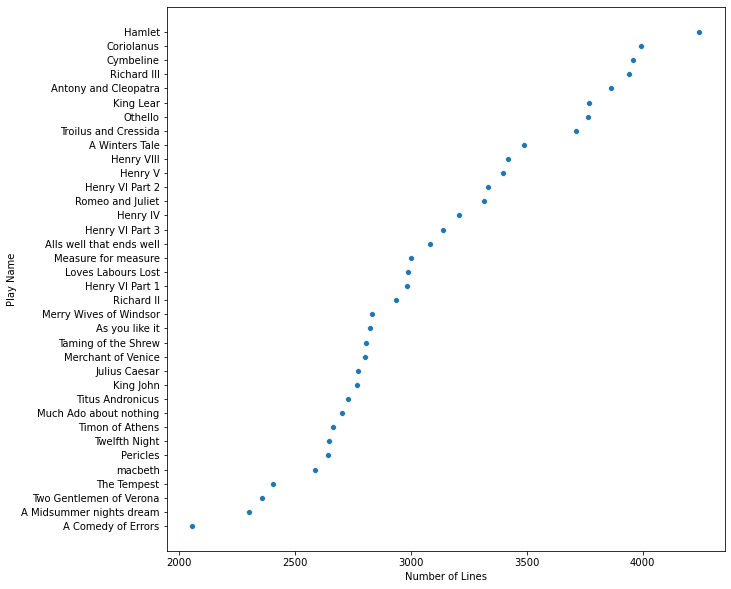

In [3]:
#display lines in each play
plt.figure(figsize=(10,10))
ax= sb.scatterplot(data=lines,x='Lines',y='Play')
ax.set(xlabel='Number of Lines', ylabel='Play Name')
plt.show()

Shakesphere plays are divided into three categories- History, Tragedy and Comedy On analysing samples of plays belonging to each of these three categories:

Noted that plays falling into the category 'comedy' are the shortest with an average of about 2700 lines per play
Historical plays have an average length of about '3200' lines
Plays falling into the category of 'Tragedy' have an average length of '3300' lines per play and hence are the longest plays

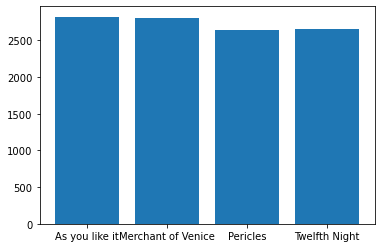

In [4]:
#category comedy
category_comedy=['As you like it', 'Merchant of Venice','Pericles', 'Twelfth Night']
c=[2822, 2802, 2641, 2648]
plt.bar(category_comedy,c)
plt.show()

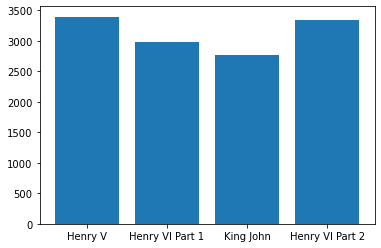

In [5]:
#category History
category_history=['Henry V','Henry VI Part 1', 'King John','Henry VI Part 2']
c=[3395, 2983,2766,3334]
plt.bar(category_history,c)
plt.show()

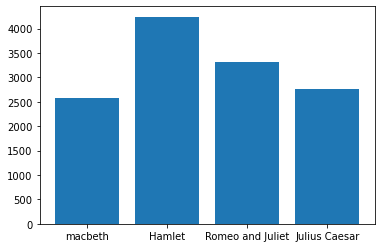

In [6]:
category_tragedy=['macbeth','Hamlet','Romeo and Juliet','Julius Caesar']
c= [2586,4244,3313,2771]
plt.bar(category_tragedy,c)
plt.show()

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree

In [8]:
#Count the number of players

players = df.Player.unique()
i=0
labPly = dict()
for player in players:
    labPly[player]=i
    i=i+1

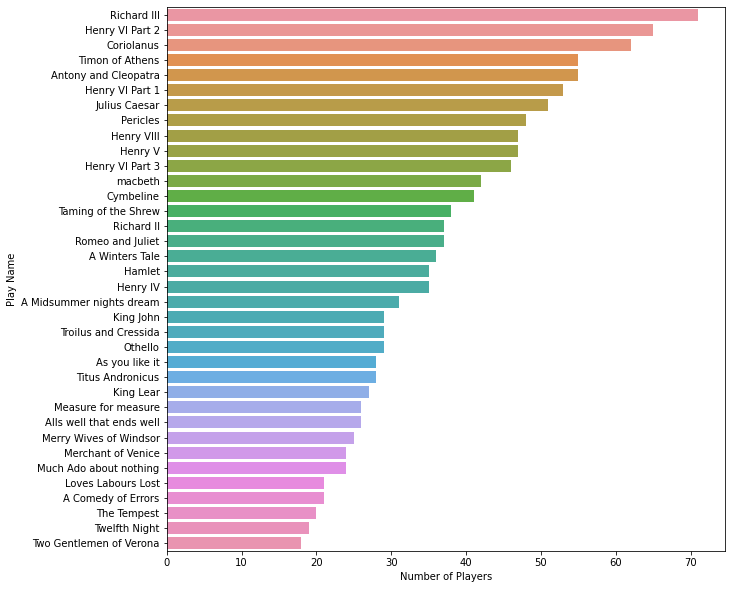

In [9]:
#graph displaying number of players in each play

numberPlayers = df.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
numberPlayers

plt.figure(figsize=(10,10))
ax = sb.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()

### Classification

In [10]:
# Convert Players to Labels
players_df = df.replace({"Player": labPly})
players_df= players_df.dropna()
players_df

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,1,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,1,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,1,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,1,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,1,No more the thirsty entrance of this soil
...,...,...,...,...,...,...
111390,111391,A Winters Tale,38.0,5.3.179,919,"Is troth-plight to your daughter. Good Paulina,"
111391,111392,A Winters Tale,38.0,5.3.180,919,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,919,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,919,Perform'd in this wide gap of time since first


In [11]:
#split dataset into train and test

import sklearn as sk
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(players_df.PlayerLine, players_df.Player, random_state=1)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [13]:
# Run Training
#Using naive bayes
clf = MultinomialNB().fit(X_train_tfidf, y_train)
clf

MultinomialNB()

In [14]:
# Testing
clf.score(count_vect.transform(X_test), y_test)

0.0328654570352619

In [15]:
# using K-nearest classification

df1= pd.read_csv('Shakespeare_data.csv')
df1= df1.dropna()
df1

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
...,...,...,...,...,...,...
111390,111391,A Winters Tale,38.0,5.3.179,LEONTES,"Is troth-plight to your daughter. Good Paulina,"
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first


In [16]:
#Generating only numeric values
df1.describe().columns

Index(['Dataline', 'PlayerLinenumber'], dtype='object')

In [17]:
df1 = df1 [['Player','Dataline','PlayerLinenumber']]
df1

,Player,Dataline,PlayerLinenumber
3,KING HENRY IV,4,1.0
4,KING HENRY IV,5,1.0
5,KING HENRY IV,6,1.0
6,KING HENRY IV,7,1.0
7,KING HENRY IV,8,1.0
...,...,...,...
111390,LEONTES,111391,38.0
111391,LEONTES,111392,38.0
111392,LEONTES,111393,38.0
111393,LEONTES,111394,38.0


In [18]:
player_names= names = df1.Player.tolist()
df1= df1.drop(['Player'], axis = 1)

In [19]:
#Normalizing the dataset

from sklearn import preprocessing

x = df1.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [20]:
#verified the data in both the columns


from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))
n=pca.explained_variance_ratio_
pca.explained_variance_ratio_

array([0.8959961, 0.1040039])

In [21]:
# Created 3 clusters for analysis

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(reduced)
labels = kmeans.predict(reduced)
centroid = kmeans.cluster_centers_
clusters = kmeans.labels_.tolist()

In [22]:
reduced['cluster'] = clusters
reduced['name'] = player_names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-0.503239,-0.068953,0,KING HENRY IV
1,-0.503230,-0.068954,0,KING HENRY IV
2,-0.503221,-0.068954,0,KING HENRY IV
3,-0.503212,-0.068954,0,KING HENRY IV
4,-0.503203,-0.068955,0,KING HENRY IV


Performed principle component analysis and retained all the features of the datasets into 2 columns- x and y which contained almost 90 % of the features of the entire dataset. Divided the data set into three clusters as per their categories.

Created a dataset of 4 longest plays

In [23]:
# ceated a dataset of 4 longest plays

option=['Hamlet', 'Coriolanus', 'Cymbeline', 'Richard III']
df_word = df[df['Play'].isin(option)]
a=df_word.drop (['Dataline', 'ActSceneLine','Player', 'PlayerLinenumber'], axis =1)
b=a.set_index('Play')
df_word.head()
b.head()

,PlayerLine
Play,
Coriolanus,ACT I
Coriolanus,SCENE I. Rome. A street.
Coriolanus,"Enter a company of mutinous Citizens, with sta..."
Coriolanus,"Before we proceed any further, hear me speak."
Coriolanus,"Speak, speak."


Created a Word cloud of the words given in the column 'Playerline' and noted that words such as 'will', 'lord', 'come', 'thy', 'good', 'thee' were frequently used.

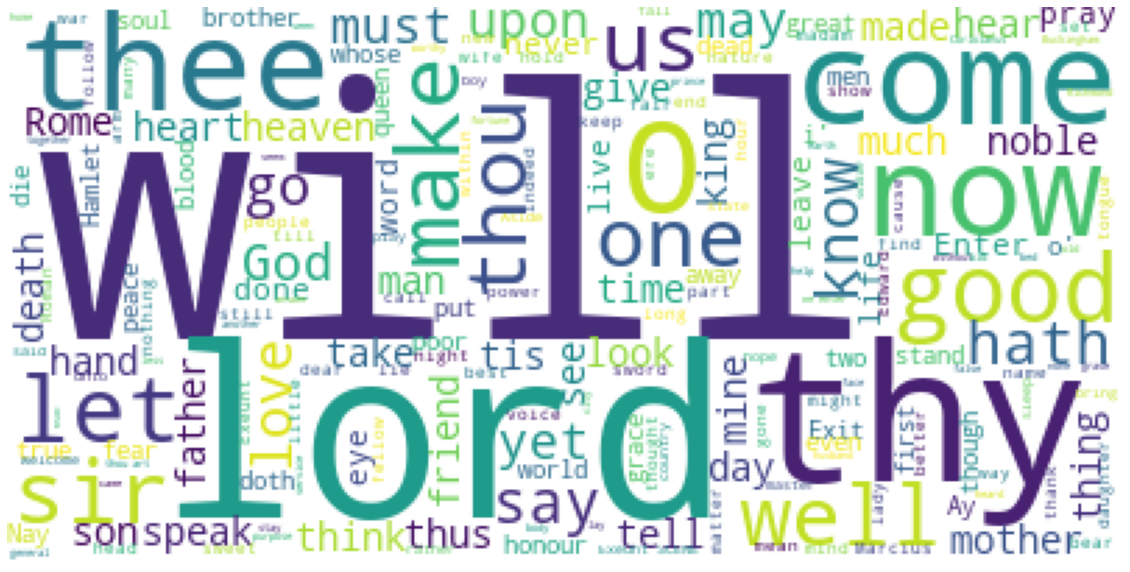

In [24]:
from wordcloud import WordCloud

wordcld = pd.Series(b['PlayerLine'].tolist()).astype(str)

# Most frequent words in the data set

from wordcloud import WordCloud 
cloud = WordCloud(background_color='white', margin=1,max_font_size=125).generate(' '.join(wordcld.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

Performed network analysis on the dataset and plotted a network diagram with plays and the players in it to analyse the plays with maximum number of connections.

In [25]:
df['Player'].replace(np.nan, 'Other',inplace = True)

# Network
import networkx as nx

g= nx.Graph()
g = nx.from_pandas_edgelist(df,source='Play',target='Player')


In [26]:
print (nx.info(g))

Name: 
Type: Graph
Number of nodes: 971
Number of edges: 1328
Average degree:   2.7353


In [ ]:
plt.figure(figsize=(40,40)) 
nx.draw_networkx(g,with_labels=True,node_size=100)
plt.show()

In [ ]:
centralMeasures = pd.DataFrame(nx.degree_centrality(g),index=[0]).T
centralMeasures.columns=['Degree Centrality']
centralMeasures['Page Rank']= pd.DataFrame(nx.pagerank(g),index=[0]).T
centralMeasures['Name']= centralMeasures.index.tolist()
centralMeasures.index = np.arange(0,len(centralMeasures))


centralMeasures[centralMeasures['Name'].isin(df['Play'].unique().tolist())].sort_values(by='Page Rank',ascending=False)

### Observations

The play with highest degree of centrality is Richar III which implies it has the maximum number of connections.
'Twelfth Night' has the least degree of centrality and hence has the least connections.
The plays in this dataset are divided into three categories- History, Tragedy and Comedy
Words such as 'will', 'lord', 'come', 'thy', 'good', 'thee' are frequently used in the plays
